## Housing Main Model

## Import Packages and Load dataset

In [1]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
pd.set_option("display.max_columns", 101)

In [2]:
# Load train dataset
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

## Overview of Dataset

In [3]:
# View a Sample
df_train.sample(10)
df_test.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1104,2565,20,RL,126.0,13108,Pave,NaN,IR2,HLS,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1Story,5,5,1951,1951,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Fa,Y,SBrkr,1226,0,0,1226,0.0,0.0,1,1,2,1,TA,7,Min1,1,Gd,Attchd,1951.0,Fin,2.0,400.0,TA,TA,Y,174,24,120,0,228,0,NaN,NaN,NaN,0,6,2007,WD,Normal
204,1665,20,RL,95.0,11578,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2008,2008,Gable,CompShg,VinylSd,VinylSd,Stone,302.0,Ex,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1736.0,1736.0,GasA,Ex,Y,SBrkr,1736,0,0,1736,0.0,0.0,2,0,3,1,Ex,7,Typ,1,Gd,Attchd,2008.0,RFn,3.0,834.0,TA,TA,Y,319,90,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
1326,2787,50,RM,56.0,9576,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,6,7,1945,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,Fa,TA,No,Rec,310.0,Unf,0.0,460.0,770.0,GasA,TA,Y,SBrkr,885,297,0,1182,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,Detchd,1945.0,Unf,1.0,378.0,Fa,TA,Y,0,0,0,0,0,0,NaN,GdWo,NaN,0,5,2006,WD,Normal
272,1733,20,RL,NaN,9079,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1961,1961,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,864.0,Unf,0.0,0.0,864.0,GasA,TA,Y,SBrkr,864,0,0,864,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,440.0,TA,TA,Y,158,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
348,1809,70,RM,90.0,9900,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,5,8,1910,2002,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,504.0,504.0,GasA,Ex,Y,SBrkr,764,700,0,1464,0.0,0.0,2,0,3,1,TA,7,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,176,0,0,0,NaN,NaN,NaN,0,3,2009,WD,Normal
848,2309,120,RL,48.0,7841,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,9,5,2005,2005,Hip,CompShg,MetalSd,MetalSd,BrkFace,394.0,Ex,TA,PConc,Ex,TA,No,GLQ,848.0,Unf,0.0,729.0,1577.0,GasA,Ex,Y,SBrkr,1577,0,0,1577,1.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2005.0,RFn,2.0,564.0,TA,TA,Y,203,39,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
677,2138,85,RL,NaN,11235,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Feedr,Norm,1Fam,SFoyer,5,6,1963,1963,Gable,CompShg,HdBoard,Wd Sdng,None,0.0,TA,TA,CBlock,Gd,TA,Av,ALQ,784.0,Unf,0.0,197.0,981.0,GasA,TA,Y,SBrkr,1075,0,0,1075,1.0,0.0,1,0,3,1,Gd,6,Typ,0,NaN,Detchd,1996.0,Unf,2.0,440.0,TA,TA,Y,64,0,0,0,64,0,NaN,MnPrv,NaN,0,5,2008,WD,Abnorml
802,2263,60,RL,98.0,12328,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,1Fam,2Story,8,5,2005,2005,Hip,CompShg,VinylSd,VinylSd,Stone,146.0,Gd,TA,PConc,Ex,TA,Mn,GLQ,986.0,Unf,0.0,163.0,1149.0,GasA,Ex,Y,SBrkr,1164,1377,0,2541,1.0,0.0,3,1,4,1,Ex,10,Typ,1,Gd,BuiltIn,2005.0,Fin,3.0,729.0,TA,TA,Y,120,32,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
74,1535,50,RM,69.0,11851,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,5,7,1948,2009,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,BrkTil,TA,TA,No,BLQ,780.0,Unf,0.0,247.0,1027.0,GasA,Ex,Y,SBrkr,1027,606,0,1633,0.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1948.0,Unf,1.0,240.0,TA,TA,Y,0,100,126,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
215,1676,120,RL,34.0,5122,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,Twnhs,1Story,6,5,2005,20

In [4]:
df_train.shape
df_test.shape

(1459, 80)

In [5]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
# Check for missing values
print('Duplicatedt train values:', df_train.duplicated().sum())
print('Duplicated test values:', df_test.duplicated().sum())

Duplicatedt train values: 0
Duplicated test values: 0


### Merge Datasets for Processing

In [7]:
# Drop ID Column
df_train = df_train.drop(columns=['Id'])
df_test = df_test.drop(columns=['Id'])

In [8]:
# Create a set variable to differnetiate between train and test
df_train['section'] = "Train"
df_test['section'] = "Test"

In [9]:
# Create a Sale Price column for df_test and set to 0 as a placeholder
df_test['SalePrice'] = 0

In [10]:
# Stack the datasets
df = pd.concat([df_train, df_test], ignore_index=True, axis = 0, sort = False)

## Missing Values & Imputation

Text(0.5, 1.0, 'Missing Values by Feature')

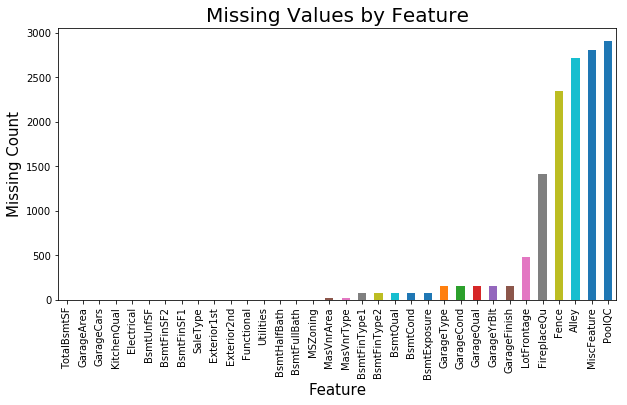

In [11]:
# Check for Columns with NA values
missing = df.isnull().sum()

# Vizualize missing value count
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(figsize = (10,5))
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Missing Count',fontsize = 15)
plt.title('Missing Values by Feature', fontsize=20)

In [12]:
# Check Number of missing numerically
print(missing)

TotalBsmtSF        1
GarageArea         1
GarageCars         1
KitchenQual        1
Electrical         1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
SaleType           1
Exterior1st        1
Exterior2nd        1
Functional         2
Utilities          2
BsmtHalfBath       2
BsmtFullBath       2
MSZoning           4
MasVnrArea        23
MasVnrType        24
BsmtFinType1      79
BsmtFinType2      80
BsmtQual          81
BsmtCond          82
BsmtExposure      82
GarageType       157
GarageCond       159
GarageQual       159
GarageYrBlt      159
GarageFinish     159
LotFrontage      486
FireplaceQu     1420
Fence           2348
Alley           2721
MiscFeature     2814
PoolQC          2909
dtype: int64


### Impute using Mode

In [13]:
temp = ['Exterior1st','Exterior2nd','KitchenQual','SaleType','Functional','Electrical','BsmtHalfBath','BsmtFullBath','MSZoning','Utilities']

for col in temp:
    df[col]=df[col].fillna(df[col].mode()[0])

#### Impute Garage Features for observations that have a garage

In [14]:
# Calcs
fin_mode = df['GarageFinish'].mode()[0]
qual_mode = df['GarageQual'].mode()[0]
cond_mode = df['GarageCond'].mode()[0]

# Impute where Garage Exists

df['GarageCars']=df['GarageCars'].fillna(df['GarageCars'].mode()[0])

df['GarageArea']=df['GarageArea'].fillna(df['GarageArea'].mean())

df['GarageFinish']=np.where((df.GarageFinish.isna())&\
                          (df.GarageType.isna()==False),fin_mode,df['GarageFinish'])

df['GarageQual']=np.where((df.GarageQual.isna())&\
                          (df.GarageType.isna()==False),qual_mode,df['GarageQual'])

df['GarageCond']=np.where((df.GarageCond.isna())&\
                          (df.GarageType.isna()==False),cond_mode,df['GarageCond'])

df['GarageYrBlt']=np.where((df.GarageYrBlt.isna())&\
                          (df.GarageType.isna()==False),df['YearBuilt'],df['GarageYrBlt'])

#### Impute MasVnrType for observations that have MasVnr


In [15]:
vnr_mode = df['MasVnrType'].mode()[0]

df['MasVnrType']=np.where((df.MasVnrType.isna())&\
                          (df.MasVnrArea.isna()==False),vnr_mode,df['MasVnrType'])

#### Impute Basement Variables for houses with a Bsmt

In [16]:
qual_mode = df['BsmtQual'].mode()[0]

df['BsmtQual'] = np.where((df.BsmtQual.isna())&\
                          (df.BsmtFinType1.isna()==False),qual_mode,df['BsmtQual'])

In [17]:
cond_mode = df['BsmtCond'].mode()[0]

df['BsmtCond'] = np.where((df.BsmtCond.isna())&\
                          (df.BsmtFinType1.isna()==False),cond_mode,df['BsmtCond'])

In [18]:
#  Find mode of BsmtExposure
bsmt_exposure_mode = df['BsmtExposure'].mode()[0]

# Fill in for observation with basement
df['BsmtExposure']=np.where((df.BsmtExposure.isna())&(df.BsmtQual.isna()==False),bsmt_exposure_mode,df['BsmtExposure'])

In [19]:
#  Find mode of BsmtFinType2
bsmt2_exposure_mode = df['BsmtFinType2'].mode()[0]

# Fill in for observation with basement
df['BsmtFinType2']=np.where((df.BsmtFinType2.isna())&(df.BsmtQual.isna()==False),bsmt2_exposure_mode,df['BsmtFinType2'])

#### Impute Mode for LotFrontage by Neighborhood

In [20]:
# Impute Lot Frontage based on mean of neighborhood
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

#### Impute PoolQC for houses with a Pool


In [21]:
#Find mode of PoolQC
pool_mode = df['PoolQC'].mode()[0]

# Fill in for observation with basement
df['PoolQC']=np.where((df.PoolQC.isna())&(df.PoolArea > 0),pool_mode,df['PoolQC'])

### Impute none for variables in which NA means None 

In [22]:
# Create List of Columns to impute None for missing
temp = ['PoolQC','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',"MasVnrType",'GarageType','GarageFinish','GarageQual','GarageCond','FireplaceQu','Fence','MiscFeature','Alley']

# Impute None
df[temp] = df[temp].fillna('None')

### Impute 0 for MasVnrArea and GarageYrBlt

In [23]:
# Create List of Columns to impute 0 for missing
temp2 = ['MasVnrArea','GarageYrBlt','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']

# Impute 0
df[temp2] = df[temp2].fillna(0)

### Get ride of Street

In [24]:
# Drop Utilities and Street as values are mostly all the same
df = df.drop(columns=['Street'])

### Check Missingness

In [25]:
missing = df.isnull().sum()
missing = missing[missing > 0]
print('Missing Values:',missing.sum())

Missing Values: 0


### Fix Garageyear 2207

In [26]:
df.loc[2592, 'GarageYrBlt'] = 2007

## Feature Engineering

In [27]:
# Convert MSSubClass to String since it is really categorical
df['MSSubClass'] = df['MSSubClass'].apply(str)

### Numerical Data

In [28]:
# Change Pool Area to Yes/No pool
df['PoolArea'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else x)

# Rename Column
df=df.rename(columns = {'PoolArea':'Pool'})

In [29]:
# Create a total porch SF
df['PorchSF'] = df['OpenPorchSF']+df['EnclosedPorch']+\
df['3SsnPorch']+df['ScreenPorch']

In [30]:
# Turn PorchTypes to Binary
temp = ['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']

for col in temp:
    df[col] = df[col].apply(lambda x: 1 if x > 0 else x)

In [31]:
num_cols = df.columns[(df.dtypes == float) | (df.dtypes == int)].tolist()
num_cols

num = df[num_cols].copy()
num

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Pool,MiscVal,MoSold,YrSold,SalePrice,PorchSF
0,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,1,0,0,0,0,0,2,2008,208500,61
1,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,181500,0
2,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,1,0,0,0,0,0,9,2008,223500,42
3,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,1,1,0,0,0,0,2,2006,140000,307
4,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,1,0,0,0,0,0,12,2008,250000,84
5,85.0,14115,5,5,1993,1995,0.0,732.0,0.0,64.0,796.0,796,566,0,1362,1.0,0.0,1,1,1,1,5,0,1993.0,2.0,480.0,40,1,0,1,0,0,700,10,2009,143000,350
6,75.0,10084,8,5,2004,2005,186.0,1369.0,0.0,317.0,1686.0,1694,0,0,1694,1.0,0.0,2,0,3,1,7,1,2004.0,2.0,636.0,255,1,0,0,0,0,0,8,2007,307000,57
7,80.0,10382,7,6,1973,1973,240.0,859.0,32.0,216.0,1107.0,1107,983,0,2090,1.0,0.0,2,1,3,1,7,2,1973.0,2.0,484.0,235,1,1,0,0,0,350,11,2009,200000,432
8,51.0,6120,7,5,1931,1950,0.0,0.0,0.0,952.0,952.0,1022,752,0,1774,0.0,0.0,2,0,2,2,8,2,1931.0,2.0,468.0,90,0,1,0,0,0,0,4,2008,129900,205
9,50.0,7420,5,6,1939,1950,0.0,851.0,0.0,140.0,991.0,1077,0,0,1077,1.0,0.0,1,0,2,2,5,2,1939.0,1.0,205.0,0,1,0,0,0,0,0,1,2008,118000,4


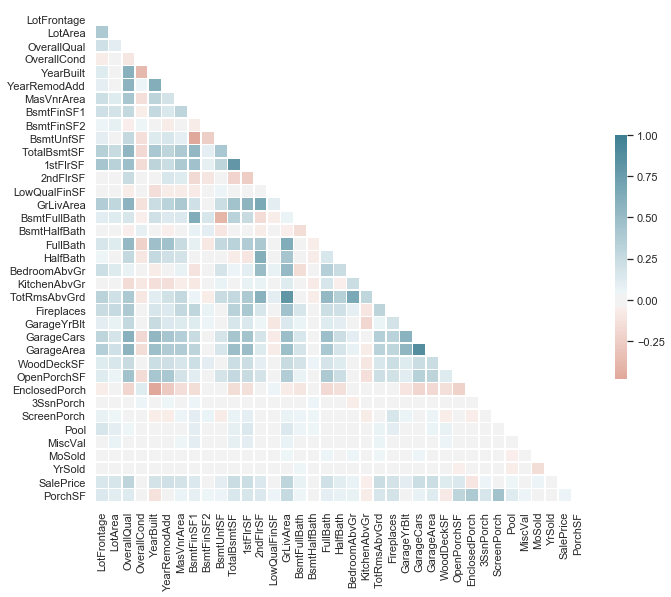

In [32]:
# Correlation Matrix - Numerically
corr = num.corr()
corr

# Correlation Matrix - Graphically
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20,220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Aditional Features

In [33]:
# Create a total bath column
df['TotalBath'] = df['BsmtFullBath']+(0.5*df['BsmtHalfBath'])+\
df['FullBath']+(0.5*df['HalfBath'])

In [34]:
# Create a total Square Feet Column
df['TotalSF'] = df['GrLivArea']+df['TotalBsmtSF']

In [35]:
df['MultiFloor'] = df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)

### Ordinal Encoding

In [36]:
ordinal = df[['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond','ExterQual', 'ExterCond','HeatingQC',\
           'PoolQC', 'KitchenQual', 'BsmtFinType1','BsmtFinType2', 'GarageFinish', 'Functional',\
           'Fence','LandSlope','BsmtExposure','LotShape', 'PavedDrive','CentralAir']].copy()

In [37]:
# Create a dictionary of all ordinal values
temp = {}

for col in ordinal:
    temp[col] = ordinal[col].unique().tolist()

In [38]:
# Take a look at Values
temp

{'FireplaceQu': ['None', 'TA', 'Gd', 'Fa', 'Ex', 'Po'],
 'BsmtQual': ['Gd', 'TA', 'Ex', 'None', 'Fa'],
 'BsmtCond': ['TA', 'Gd', 'None', 'Fa', 'Po'],
 'GarageQual': ['TA', 'Fa', 'Gd', 'None', 'Ex', 'Po'],
 'GarageCond': ['TA', 'Fa', 'None', 'Gd', 'Po', 'Ex'],
 'ExterQual': ['Gd', 'TA', 'Ex', 'Fa'],
 'ExterCond': ['TA', 'Gd', 'Fa', 'Po', 'Ex'],
 'HeatingQC': ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
 'PoolQC': ['None', 'Ex', 'Fa', 'Gd'],
 'KitchenQual': ['Gd', 'TA', 'Ex', 'Fa'],
 'BsmtFinType1': ['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'None', 'LwQ'],
 'BsmtFinType2': ['Unf', 'BLQ', 'None', 'ALQ', 'Rec', 'LwQ', 'GLQ'],
 'GarageFinish': ['RFn', 'Unf', 'Fin', 'None'],
 'Functional': ['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev'],
 'Fence': ['None', 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'],
 'LandSlope': ['Gtl', 'Mod', 'Sev'],
 'BsmtExposure': ['No', 'Gd', 'Mn', 'Av', 'None'],
 'LotShape': ['Reg', 'IR1', 'IR2', 'IR3'],
 'PavedDrive': ['Y', 'N', 'P'],
 'CentralAir': ['Y', 'N']}

In [39]:
# Create dict based on dict
temp_dict = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5,'Mn': 2, 'Av': 3,'No': 1,\
             'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6,'RFn': 4, 'Fin': 6,\
             'Sal': 0, 'Sev': 1, 'Maj2': 2, 'Maj1': 3, 'Mod': 4, 'Min2': 5, 'Min1': 6, 'Typ': 7,\
             'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4,'Sev': 0, 'Mod': 1, 'Gtl': 2,'Y':1,'N':0,\
             'Reg':3, 'IR1':2, 'IR2':1, 'IR3':0}

# Convert Paved Drive on its own
ordinal['PavedDrive'] = ordinal['PavedDrive'].map({'Y': 2, 'P': 1, 'N': 0}).astype(int)

# Encode the rest of the columns
for col in ordinal.columns.drop("PavedDrive"):
    ordinal[col] = ordinal[col].map(temp_dict).astype(int)
    

In [40]:
# Replace columns in the train dataset
for col in ordinal.columns:
    df[col]=ordinal[col]

In [41]:
# Checkout remaining Categorical Columns
df.columns[df.dtypes == object]

Index(['MSSubClass', 'MSZoning', 'Alley', 'LandContour', 'Utilities',
       'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType',
       'MiscFeature', 'SaleType', 'SaleCondition', 'section'],
      dtype='object')

### Dummify and Split Data for Modeling

In [42]:
# Code Breakdown to ordinal so that it is not dummified
df['section'] = df['section'].map({'Test': 0, 'Train': 1}).astype(int)

In [43]:
# Dummify
df = pd.get_dummies(df,drop_first=True)

### Transformations

In [44]:
#skew(num)

In [45]:
#skewed_feats = df[num_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
#skewness = pd.DataFrame({'Skew' :skewed_feats})
#skewness.head(10)

In [46]:
#skewness = skewness[abs(skewness.Skew)>0.75]

#from scipy.special import boxcox1p
#skewed_features = skewness.index
#lam = 0.15
#for feat in skewed_features:
    #df[feat] = boxcox1p(df[feat], lam)

In [47]:
# Split Data into Original Groups
train = df[df['section'] == 1].drop(columns=['section'])
test = df[df['section'] == 0].drop(columns=['section'])

### Drop Outliers

In [48]:
train = train[train['GrLivArea'] < 4500]

In [49]:
# Remove Response Variable from X_tr
X_tr = train.drop(columns=['SalePrice'])
#X_tr.to_csv("X_tr.csv",index = False)

# Set Response Variable y_tr
y_tr = train['SalePrice']
#y_tr.to_csv("y_tr.csv",index = False)

# Remove Response Variable from X_tr
X_te = test.drop(columns=['SalePrice'])
#X_te.to_csv("X_te.csv",index = False)

### Ridge Regression

In [50]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
ridge = Ridge()
lasso = Lasso()
net   = ElasticNet()

In [51]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X_tr)
x_new = transformer.transform(X_tr)

In [52]:
from sklearn.model_selection import GridSearchCV

alphas = np.linspace(1e-3,200,20)
gs = GridSearchCV(ridge, {"alpha":alphas},cv=5,iid = True,scoring="neg_mean_squared_error")
gs.fit(X_tr, np.log(y_tr))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'alpha': array([1.00000e-03, 1.05273e+01, 2.10535e+01, 3.15798e+01, 4.21061e+01,
       5.26323e+01, 6.31586e+01, 7.36848e+01, 8.42111e+01, 9.47374e+01,
       1.05264e+02, 1.15790e+02, 1.26316e+02, 1.36842e+02, 1.47369e+02,
       1.57895e+02, 1.68421e+02, 1.78947e+02, 1.89474e+02, 2.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [53]:
gs.best_params_

{'alpha': 21.053526315789476}

### Lets run cross valdiation to calculate our test error

In [54]:
import sklearn.model_selection as ms
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

In [55]:
ridge.set_params(alpha=21.053526315789476,normalize = False)
rmse = np.sqrt(-ms.cross_val_score(ridge,X=x_new, y=np.log(y_tr), scoring="neg_mean_squared_error", cv = 5))
rmse.mean()

0.11463904830815552

### Fit Model on Training Set

In [56]:
ridge.set_params(alpha=21.053526315789476)
ridge.fit(x_new, np.log(y_tr))

Ridge(alpha=21.053526315789476, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [57]:
ridge.coef_

array([ 9.61625899e-03,  7.87932322e-03, -3.24249012e-03,  9.50401671e-03,
        9.86620467e-02,  4.12617193e-02,  6.59894541e-02,  2.50905683e-02,
        6.16363624e-03,  1.35310734e-02, -1.48190731e-02,  9.44103717e-03,
       -5.76013645e-03,  1.21586953e-02,  1.43409870e-02,  2.94624107e-02,
       -5.90315323e-03,  3.30601563e-05, -1.43597958e-02,  2.50195943e-02,
        2.41940638e-02,  5.13741842e-02,  3.79397521e-02,  3.79454745e-02,
       -3.42251324e-05,  7.24727723e-02, -2.19195783e-03, -1.25479911e-02,
        4.72985689e-03,  2.07436851e-02, -3.12528734e-03, -2.90052902e-02,
        1.87442163e-02,  1.29973362e-02,  2.39945656e-02,  1.55130223e-02,
        1.79963200e-02, -1.45361664e-03,  3.59233297e-03,  2.54036259e-02,
        1.58159717e-02,  2.06070768e-02,  1.05182271e-02,  1.32380972e-02,
        1.49775568e-02, -3.50219197e-03, -3.97276863e-03,  1.80916451e-03,
        1.42259593e-02,  2.34972674e-03,  1.07584322e-02, -2.65900770e-03,
       -7.55189839e-07, -

### Make a Prediction

In [58]:
x_new1 = transformer.transform(X_te)
predict_ridge = ridge.predict(x_new1)

In [59]:
predict_ridge

array([11.64223996, 11.95567544, 12.08168448, ..., 12.05466901,
       11.63765948, 12.31090875])

In [60]:
# submit_kaggle('ridge_reg_3.csv',predict_ridge)

NameError: name 'submit_kaggle' is not defined

### Lasso

In [61]:
alphas = np.linspace(1e-3,200,20)
gs = GridSearchCV(lasso, {"alpha":alphas},cv=5,iid = True,scoring="neg_mean_squared_error")
gs.fit(x_new, np.log(y_tr))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'alpha': array([1.00000e-03, 1.05273e+01, 2.10535e+01, 3.15798e+01, 4.21061e+01,
       5.26323e+01, 6.31586e+01, 7.36848e+01, 8.42111e+01, 9.47374e+01,
       1.05264e+02, 1.15790e+02, 1.26316e+02, 1.36842e+02, 1.47369e+02,
       1.57895e+02, 1.68421e+02, 1.78947e+02, 1.89474e+02, 2.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [62]:
gs.best_params_

{'alpha': 0.001}

In [63]:
lasso.set_params(alpha=0.001)
rmse = np.sqrt(-ms.cross_val_score(lasso,X=x_new, y=np.log(y_tr), scoring="neg_mean_squared_error", cv = 5))
rmse.mean()

0.114303468870482

In [64]:
lasso.fit(x_new, np.log(y_tr))

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [65]:
lasso.coef_

array([ 1.03702088e-02,  7.66945445e-03, -3.84382281e-03,  0.00000000e+00,
        1.16810612e-01,  4.11791932e-02,  7.69396599e-02,  2.14722259e-02,
        4.95133628e-03,  1.18121457e-02, -6.22816680e-03,  2.44903833e-03,
       -0.00000000e+00,  1.15397923e-02,  0.00000000e+00,  5.38399661e-02,
       -3.76625884e-03,  5.24206303e-05, -0.00000000e+00,  0.00000000e+00,
        2.37591048e-02,  4.28859561e-02,  6.69613933e-03,  0.00000000e+00,
       -7.13437884e-05,  1.03290623e-01,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  9.52424476e-03, -0.00000000e+00, -2.19116277e-02,
        1.96171269e-02,  3.47427019e-03,  2.25847315e-02,  1.50700926e-02,
        1.64155642e-02,  2.54686888e-04,  1.83433881e-03,  2.57176826e-02,
        1.44154124e-02,  1.19492036e-02,  7.89570419e-04,  7.36163662e-03,
        1.35215084e-02, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        5.14883560e-03,  0.00000000e+00,  0.00000000e+00, -2.63958977e-03,
       -2.54463863e-06, -

In [66]:
temp = pd.DataFrame({
    "Feature": X_tr.columns,
    "Coef": lasso.coef_
})

temp[temp.Coef != 0].sort_values(by = "Coef", ascending = False)

,Feature,Coef
4,OverallQual,0.116811
25,GrLivArea,0.103291
211,SaleType_New,0.101924
93,Neighborhood_Crawfor,0.089161
57,TotalSF,0.088408
6,YearBuilt,0.076940
76,MSZoning_RL,0.057403
15,BsmtFinSF1,0.053840
217,SaleCondition_Normal,0.053111
21,CentralAir,0.042886


In [67]:
predict_lasso = lasso.predict(x_new1)

In [68]:
# submit_kaggle('lasso_reg.csv',predict)

### ElasticNet

In [69]:
### ElasticNet
alphaSize  = 40
rhoSize    = 30
alphaRange = np.linspace(1e-2, 10, alphaSize)
rhoRange   = np.linspace(0.01, 1, rhoSize)

parametersGrid = {"alpha": alphaRange,
                  "l1_ratio": rhoRange}

grid = GridSearchCV(net, parametersGrid, cv=5)
grid.fit(x_new, np.log(y_tr))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([ 0.01   ,  0.26615,  0.52231,  0.77846,  1.03462,  1.29077,
        1.54692,  1.80308,  2.05923,  2.31538,  2.57154,  2.82769,
        3.08385,  3.34   ,  3.59615,  3.85231,  4.10846,  4.36462,
        4.62077,  4.87692,  5.13308,  5.38923,  5.64538,  5.90154,
        6.1...76,
       0.7269 , 0.76103, 0.79517, 0.82931, 0.86345, 0.89759, 0.93172,
       0.96586, 1.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [70]:
grid.best_params_

{'alpha': 0.01, 'l1_ratio': 0.04413793103448276}

In [71]:
net.set_params(alpha=0.01, l1_ratio=0.04413793103448276)
rmse = np.sqrt(-ms.cross_val_score(net,X=x_new, y=np.log(y_tr), scoring="neg_mean_squared_error", cv = 5))
rmse.mean()

0.11376794893454442

In [72]:
net.fit(x_new, np.log(y_tr))

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True,
      l1_ratio=0.04413793103448276, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [73]:
predict_net = net.predict(x_new1)

In [74]:
# submit_kaggle('net_reg.csv',predict)

### Gradient Boosting

In [75]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [76]:
gbm = GradientBoostingRegressor()

In [77]:
gbm.fit(x_new, np.log(y_tr))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [78]:
gbm.score(x_new, np.log(y_tr))

0.959692116135507

In [79]:
predict_gbm = gbm.predict(x_new1)

In [80]:
# submit_kaggle('gbm_test.csv',predict)

In [81]:
gbm.feature_importances_

array([4.67097321e-04, 1.38486764e-02, 1.42319138e-05, 0.00000000e+00,
       3.66704745e-01, 1.56565552e-02, 1.13305035e-02, 1.52244687e-02,
       1.11382351e-04, 1.37764823e-02, 9.44662150e-04, 4.93717413e-03,
       0.00000000e+00, 2.19790022e-03, 2.09667227e-03, 5.34798957e-03,
       1.46721726e-05, 6.94594231e-05, 1.44462954e-03, 2.66067972e-04,
       1.45180747e-03, 1.40901863e-02, 6.72778398e-03, 2.35940027e-03,
       1.10903092e-04, 1.18954363e-02, 9.73465987e-05, 2.50553055e-05,
       7.05835876e-05, 0.00000000e+00, 2.81173369e-04, 0.00000000e+00,
       1.93888804e-02, 1.14881408e-04, 1.90572405e-03, 2.84212806e-04,
       1.55129376e-02, 4.87776556e-03, 1.38881504e-02, 1.53951042e-02,
       4.91959914e-03, 0.00000000e+00, 5.47717481e-03, 1.25925195e-03,
       1.30356788e-03, 2.34991343e-05, 3.20200573e-05, 0.00000000e+00,
       5.40061979e-04, 0.00000000e+00, 3.72840257e-04, 0.00000000e+00,
       1.92951645e-05, 6.26697269e-04, 1.16757548e-03, 2.82968083e-03,
      

In [82]:
predict_lasso

array([11.61064492, 11.94223241, 12.07285953, ..., 12.05644666,
       11.65205255, 12.34692672])

In [87]:
predict_avg = ((0.5*predict_ridge) + (0.5*predict_net))

In [88]:
predict_avg

array([11.63280006, 11.94711948, 12.07944612, ..., 12.05767335,
       11.6452796 , 12.320174  ])

In [89]:
submit_kaggle("predict_avg_4.csv",predict_avg)

File Saved!


## Submit

In [86]:
# Input filename as a .csv

def submit_kaggle(filename, prediction):
    vals = np.exp(prediction)
    indexes = list(range(1461,1461+len(vals)))
    predictions = pd.DataFrame()
    predictions['Id'] = indexes
    predictions['SalePrice'] = vals
    predictions.to_csv(filename,index = False)
    print('File Saved!')